# Probability and Statistics


August 24, 2023


##### **Some Notations:**

X: Scalar, N-dimensional for N observations/samples;

$X_{i}$: single measurement of the above, where $i$ goes from 1 to N;

{$X_i$}: The set of all N measurements;

h(X): "True" distribution from which the $X_i$ are drawn---this can take a variety of forms such as Gaussian, Uniform, Spiky etc.


The **Probability density function** aka PDF is defined as:

Probability for X to lie in an interval $[X, X+dX] = h(X)dX$

Here, $h(X)$ is the Probability density function, which should be normalized:

$$\int_{-\infty}^{\infty} h(X) dX = 1$$


The **Cumulative Distribution Function** aka CDF *of a probability distribution* is defined as:


$$H(X) = \int_{-\infty}^{X} h(X') dX' = 1$$


0.9999999999999999


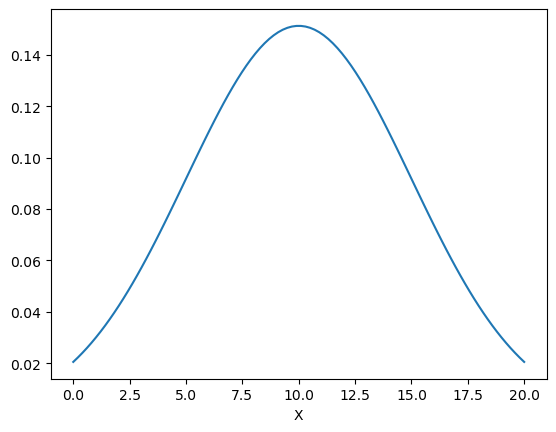

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Create a Gaussian normal PDF:

X = np.linspace(0,20,100)
mu = 10.
sigma = 5.

def gaussian_normal(X, mu, sigma):
    G = 1/sigma*np.sqrt(2*np.pi) * np.exp(-1./2*((X-mu)**2/sigma**2))
    return(G/np.linalg.norm(G))

PDF = gaussian_normal(X, mu, sigma)
# Check normalization:
print(np.linalg.norm(PDF))

#Plot:

plt.plot(X, PDF)
plt.xlabel("X")
plt.show()

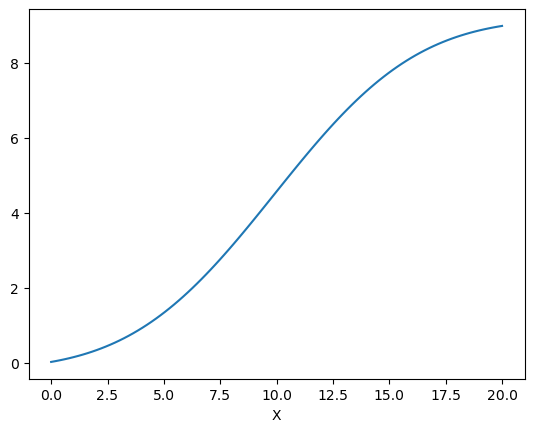

In [26]:
# Compute the CDF of this PDF:

plt.plot(X, np.cumsum(PDF))
plt.xlabel("X")
plt.show()

## Introducing the **model** distribution:

Say you make a set of measurements of the height of students in a class (expected to be Gaussian for large enough numbers of students). Your measurements will give you an *estimated* distribution of heights, which is $h(X)$. But how sure are you that the actual, inherent distribution is Gaussian? It could be something more wanky, like a sombrero distribution. We can **model** any number of such  

Note: Here, $h(X)$ is said to be the true distribution (unaffected by noise? No, since the true distribution describes what's in nature and noise is also part of nature). Since the data has to be faithful to this distribution that's actually out there, all measurements we make follow $h(X)$. But we don't know the form of $h(X)$ inherently, and this is something we need to infer. This is typically done using model selection, comparing several models for the distribution to see which one fits best.

Introduce $f(X)$ has a model for a "true" PDF $h(X)$.
Then, $F(X)$ will be the corresponding CDF for $H(X)$.


#### Some things to keep in mind when working with distributions, whether measured or modelled: **The Kolmogorov axioms** <br><br>

1. $P(A) \geq 0$ - Probabilities are always non-negative <br><br>
2. $P{\Sigma}) = 1$, i.e. $\int P(X)dX = 1$, where $\Sigma$ is the universal set. <br><br>
3. If $A_1, A_2, ..., A_i$ are disjoint sets, $P(\bigcup_{i=1}^{N} A_i) = \sum_{i=i}^{N} P(A_i)$  <br><br>


##### **The Conditional Probability**

$$P(A\cap B) = P(A|B)P(B) = P(B|A)P(A)$$

Here, $P(A|B)$ is the conditional probability of event A given B, and  $P(B|A)$ is that of event B given A. These don't need to be equal, but the above product holds when multiplied by the individual probabilities of the event that has already occurred.

*In these notes, we shall use $P(A,B) = P(A\cap B)$.*

##### **Law of total probability**

$$P(A) = \sum_{i} P(A|B_{i})P(B_{i})$$


## Random Variables
A random or stocastic variable is a variable that can take a set of possible different values, each with an associated probability. 


However, if $A$ and $B$ are independent random variables, then 

$$p(A,B) = p(A)p(B)$$

Let's look an example.

If you have a bag with 5 marbles, 3 yellow and 2 blue and you want to know the probability of picking 2 yellow marbles in a row, that would be

$$p(Y_1,Y_2) = p(Y_1)p(Y_2|Y_1).$$

$p(Y_1) = \frac{3}{5}$ since you have an equally likely chance of drawing any of the 5 marbles.

If you did not put the first marble back in the back after drawing it (sampling *without* "replacement"), then the probability

$p(Y_2|Y_1) = \frac{2}{4}$, so that

$$p(Y_1,Y_2) = \frac{3}{5}\frac{2}{4} = \frac{3}{10}.$$

But if you put the first marble back, then

$p(Y_2|Y_1) = \frac{3}{5} = p(Y_2)$, so that 

$$p(Y_1,Y_2) = \frac{3}{5}\frac{3}{5} = \frac{9}{25}.$$

In the first case $A$ and $B$ (or rather $Y_1$ and $Y_2$) are *not* independent, whereas in the second case they are.

We say that two random variables, $A$ and $B$ are independent *if*

$p(A,B) = p(A)p(B)$ (knowing $B$ does not give any information about $A$ and vice versa).